c:\Users\User\miniconda3\envs\datascience\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


11501568/11490434 [==============================] - 2s 0us/step


c:\Users\User\miniconda3\envs\datascience\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
469/469 [==============================] - 2s 1ms/step - loss: 1.2177 - accuracy: 0.6944 - val_loss: 0.6699 - val_accuracy: 0.8500
Epoch 2/20
469/469 [==============================] - 0s 828us/step - loss: 0.5709 - accuracy: 0.8594 - val_loss: 0.4714 - val_accuracy: 0.8811
Epoch 3/20
469/469 [==============================] - 0s 819us/step - loss: 0.4522 - accuracy: 0.8817 - val_loss: 0.4018 - val_accuracy: 0.8945
Epoch 4/20
469/469 [==============================] - 0s 819us/step - loss: 0.4008 - accuracy: 0.8916 - val_loss: 0.3650 - val_accuracy: 0.9034
Epoch 5/20
469/469 [==============================] - 0s 817us/step - loss: 0.3705 - accuracy: 0.8985 - val_loss: 0.3420 - val_accuracy: 0.9071
Epoch 6/20
469/469 [==============================] - 0s 821us/step - loss: 0.3496 - accuracy: 0.9039 - val_loss: 0.3249 - val_accuracy: 0.9117
Epoch 7/20
469/469 [==============================] - 0s 817us/step - loss: 0.3335 - accuracy: 0.9074 - val_loss: 0.3118 - val_accuracy: 0

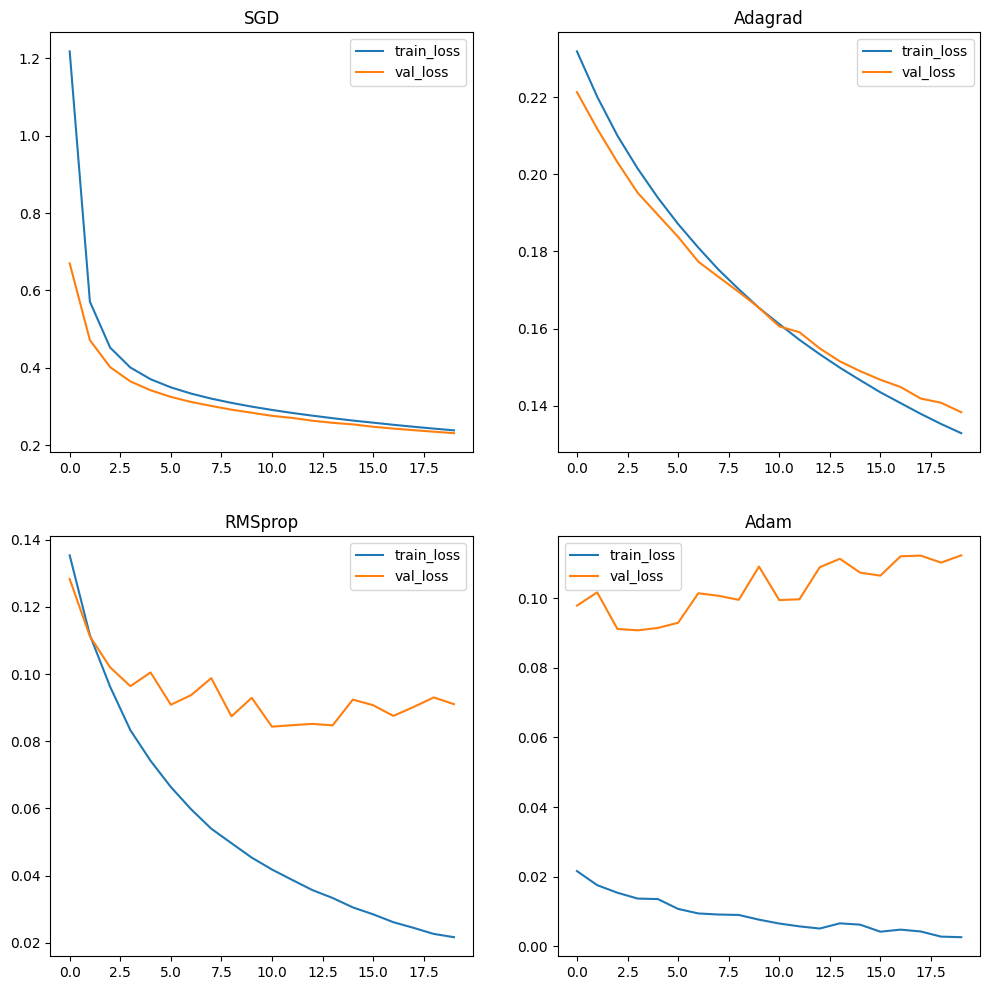

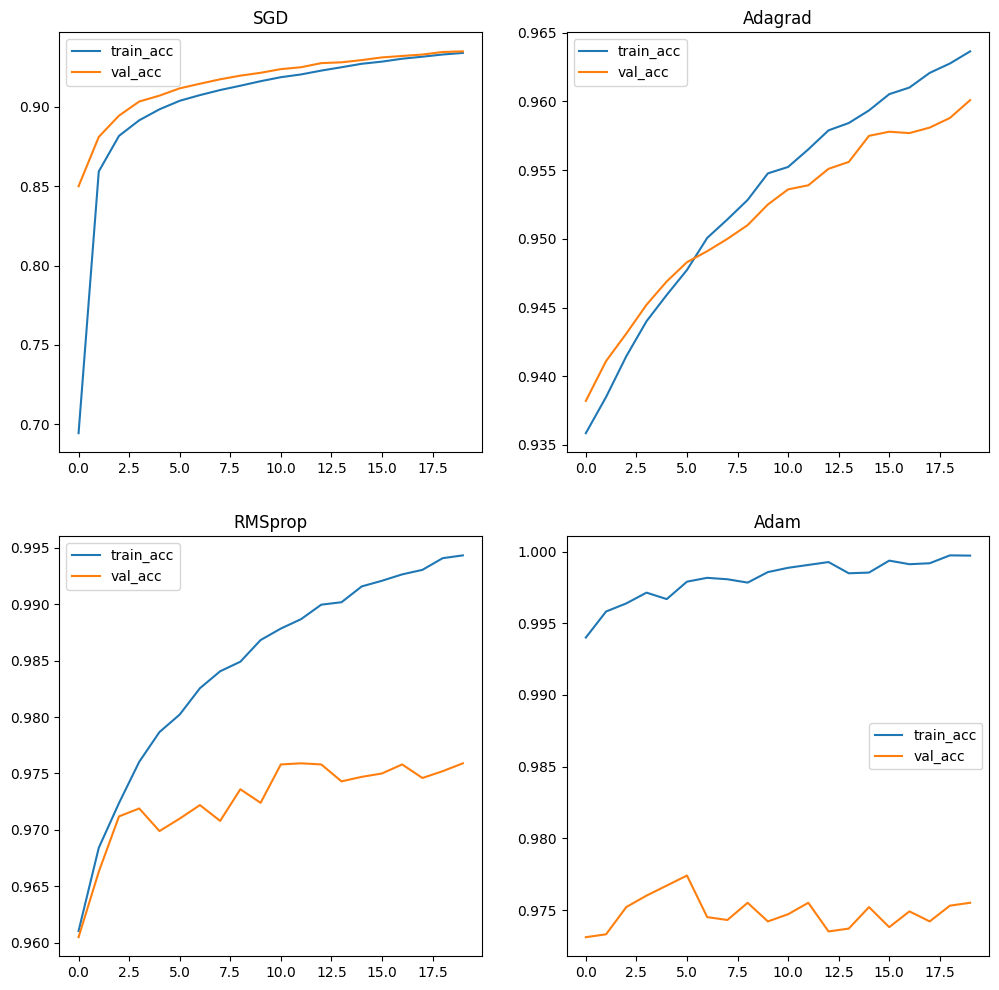

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.utils import to_categorical

# MNIST 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer 설정
sgd = SGD(lr=0.01)
adagrad = Adagrad(lr=0.01)
rmsprop = RMSprop(lr=0.001)
adam = Adam(lr=0.001)

# optimizer 이름과 모델 컴파일한 이름을 딕셔너리로 생성
optimizers = {
    'SGD': sgd,
    'Adagrad': adagrad,
    'RMSprop': rmsprop,
    'Adam': adam
}

# 학습과정에서 추적할 값 초기화
train_loss = {}
train_acc = {}
val_loss = {}
val_acc = {}

# 모든 optimizer에 대해 학습 및 값을 추적하여 저장
for optimizer_name, optimizer in optimizers.items():
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=1)
    
    train_loss[optimizer_name] = hist.history['loss']
    train_acc[optimizer_name] = hist.history['accuracy']
    val_loss[optimizer_name] = hist.history['val_loss']
    val_acc[optimizer_name] = hist.history['val_accuracy']

# 결과 plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
    row = i // 2
    col = i % 2
    
    axes[row, col].plot(train_loss[optimizer_name], label='train_loss')
    axes[row, col].plot(val_loss[optimizer_name], label='val_loss')
    axes[row, col].set_title(optimizer_name)
    axes[row, col].legend()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
    row = i // 2
    col = i % 2
    axes[row, col].plot(train_acc[optimizer_name], label='train_acc')
    axes[row, col].plot(val_acc[optimizer_name], label='val_acc')
    axes[row, col].set_title(optimizer_name)
    axes[row, col].legend()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.utils import to_categorical

c:\Users\User\miniconda3\envs\datascience\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


# Optimizer 정의

In [6]:
def gradient_descent_optimizer(weight, epochs, learning_rate):
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        weight = weight - learning_rate * grad
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

def momentum_optimizer(weight, epochs, learning_rate, momentum):
    velocity = np.zeros_like(weight)
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        velocity = momentum * velocity + learning_rate * grad
        weight = weight - velocity
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

def rmsprop_optimizer(weight, epochs, learning_rate, decay_rate, epsilon):
    cache = np.zeros_like(weight)
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        cache = decay_rate * cache + (1 - decay_rate) * grad ** 2
        weight = weight - learning_rate * grad / (np.sqrt(cache) + epsilon)
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

def adam_optimizer(weight, epochs, learning_rate, beta1, beta2, epsilon):
    m = np.zeros_like(weight)
    v = np.zeros_like(weight)
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** (epoch + epochs))
        v_hat = v / (1 - beta2 ** (epoch + 1))
        weight = weight - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

def adagrad_optimizer(weight, epochs, learning_rate, epsilon):
    cache = np.zeros_like(weight)
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        cache = cache + grad ** 2
        weight = weight - learning_rate * grad / (np.sqrt(cache) + epsilon)
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

def visualize_weights(history_list):
    plt.figure(figsize=(10, 10))
    for i, history in enumerate(history_list):
        weights = np.array(history)[:, :10].reshape(-1, 28, 28)
        plt.subplot(2, 2, i+1)
        plt.imshow(weights.mean(axis=0), cmap='gray')
        plt.title('Optimizer {}'.format(i+1))
    plt.tight_layout()
    plt.show()

# def calculate_gradient(weight):
#     return np.dot(x_train.T, (np.dot(x_train, weight) - y_train))
def calculate_gradient(weight):
    gradient = np.zeros_like(weight)
    X = X_train
    y = y_train

    z = np.dot(X, weight)
    error = z - y
    grad = np.dot(X.T, error) / len(X)
    gradient = grad

    return gradient

def loss(weight):
    y_pred = x_train @ weight
    return ((y_train - y_pred) ** 2).mean()

# 이미지 로드 및 전처리

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# train

In [14]:
sgd_history = []
momentum_history = []
rmsprop_history = []
adam_history = []
adagrad_history = []

weight = np.random.randn(784, 1) * 0.01
EPOCHS = 50
lr = 1e-3

for i in range(100):
    # SGD optimizer
    sgd = gradient_descent_optimizer(weight, epochs=EPOCHS, learning_rate=lr)
    sgd_history.append(sgd)

    # Momentum optimizer
    momentum = momentum_optimizer(weight, epochs=EPOCHS, learning_rate=lr, momentum=0.9)
    momentum_history.append(momentum)

    # RMSprop optimizer
    rmsprop = rmsprop_optimizer(weight, epochs=EPOCHS, learning_rate=lr, decay_rate=0.9, epsilon=1e-8)
    rmsprop_history.append(rmsprop)

    # Adam optimizer
    adam = adam_optimizer(weight, epochs=EPOCHS, learning_rate=lr, beta1=0.9, beta2=0.999, epsilon=1e-8)
    adam_history.append(adam)

    # Adagrad optimizer
    adagrad = adagrad_optimizer(weight, epochs=EPOCHS, learning_rate=lr, epsilon=1e-8)
    adagrad_history.append(adagrad)

c:\Users\User\miniconda3\envs\datascience\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp\ipykernel_13392\1138343405.py:78: RuntimeWarning: overflow encountered in square
  return ((y_train - y_pred) ** 2).mean()


KeyboardInterrupt: 

# 시각화

In [ ]:
visualize_weights([sgd_history, momentum_history, rmsprop_history, adam_history, adagrad_history])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 안장점 데이터 생성
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2
x_train = np.random.randn(784, 1) * 0.01
y_train = 

# Gradient Descent optimizer 함수 정의
def gradient_descent_optimizer(weight, epochs, learning_rate):
    weights_history = [weight]
    loss_history = []
    for epoch in range(epochs):
        grad = calculate_gradient(weight)
        weight = weight - learning_rate * grad
        weights_history.append(weight)
        loss_history.append(loss(weight))
    return weights_history, loss_history

# 초기 weight 설정
initial_weight = np.array([7, 7]).reshape(2, 1)

# Gradient Descent optimizer를 사용하여 weight 업데이트
weights_history, loss_history = gradient_descent_optimizer(initial_weight, epochs=10, learning_rate=0.1)

# weight 평면 위 변화하는 모습 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.plot([0], [0], [0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10)

for i in range(len(weights_history)):
    w = weights_history[i]
    l = loss_history[i]
    ax.plot([w[0]], [w[1]], [l], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=3, alpha=1-i/len(weights_history))

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('loss')
plt.show()


NameError: name 'y_train' is not defined

dfsadf

In [9]:
# coding: utf-8
import numpy as np

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

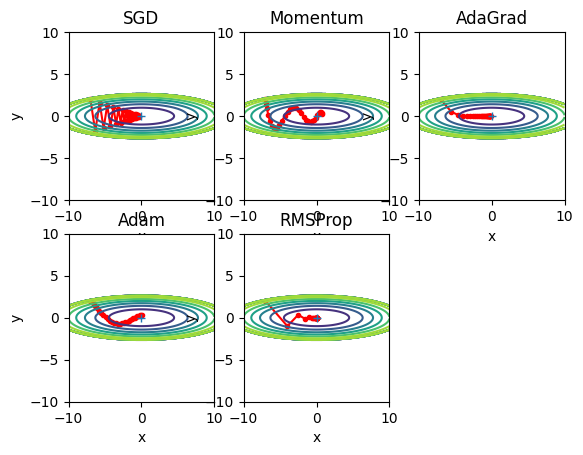

In [17]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y


init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)
optimizers["RMSProp"] = RMSprop(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 3, idx)
    idx += 1
    plt.plot(x_history, y_history, '.-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    # colorbar()
    # spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

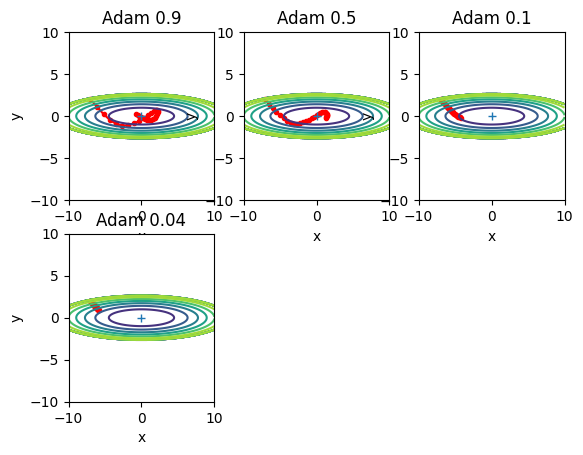

In [23]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y


init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
# optimizers["SGD"] = SGD(lr=0.95)
# optimizers["Momentum"] = Momentum(lr=0.1)
# optimizers["AdaGrad"] = AdaGrad(lr=1.5)
# optimizers["Adam"] = Adam(lr=0.3)
# optimizers["RMSProp"] = RMSprop(lr=0.3)
optimizers["Adam 0.9"] = Adam(lr=0.9)
optimizers["Adam 0.5"] = Adam(lr=0.5)
optimizers["Adam 0.1"] = Adam(lr=0.1)
optimizers["Adam 0.04"] = Adam(lr=0.04)


idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 3, idx)
    idx += 1
    plt.plot(x_history, y_history, '.-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    # colorbar()
    # spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()